# CREATE GENOME NAMES MAPPER 
Create a dataframe mapping the genome name between original genomes, PanDelos, and Roary

In [1]:
import os
import numpy as np
import re
import pandas as pd 
import pyranges as pr
import re 
from collections import Counter
import matplotlib.pyplot as plt

# graphical stuff
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['figure.dpi'] = 300

species = 'fusobacterium_ulcerans' 

# set directories
basedir = os.getcwd()
delosdir = basedir+'/'+species+'/PanDelos'
roarydir = basedir+'/'+species+'/Roary'
comparisondir = basedir+'/'+species+'/Comparison/'

os.makedirs(comparisondir,exist_ok=True)

In [2]:
genome_names = os.listdir(delosdir+'/output/fragmented')
matchfile='predictedCDSs_filtered_only_genes.bed'
dict_list_names = []

# read roary file to associate roary aliases to genome names
with open(roarydir+'/output/gene_presence_absence.csv') as f:
    lines = f.readlines()[0:2]
    colnames = lines[0]
    aliases = lines[1]
    
    colnames = colnames.split(',')
    indexes_prokka = [i for i,name in enumerate(colnames) if re.search("prokka", name)]
    colnames = np.array(colnames)[indexes_prokka]
    aliases = np.array(aliases.split(','))[indexes_prokka]
    aliases = [a.split('_')[0] for a in aliases]
    
    names_to_aliases_roary = {colnames[i].strip().strip('\"'):aliases[i].strip().strip('\"') for i,v in enumerate(colnames)}

# read pandelos file to associate pandelos aliases to genome name
for g in genome_names:
    files = os.listdir(delosdir+'/output/fragmented/' + g + '/artifacts')
    afile = [f for f in files if f.endswith(matchfile)][0]
    with open(delosdir+'/output/fragmented/' + g + '/artifacts/' +afile) as f:
        delos_name = f.readline().split('\t')[0]
        
    dict_row = {'genome':g, 'pandelos_name':delos_name, 'roary_name': names_to_aliases_roary['prokka_'+g]}
    dict_list_names.append(dict_row)

# add also complete genomes
ref_genome =  os.listdir(delosdir+"/output/complete")
ref_genome_m = [not r.endswith('.fai') for r in ref_genome]
ref_genome = np.array(ref_genome)[ref_genome_m][0]
print(ref_genome)
ref_delos=delos_name.split('reconstructed')[0]

ref = {'genome': ref_genome, 'pandelos_name':ref_delos, 'roary_name':names_to_aliases_roary['prokka_'+ref_genome]}
dict_list_names.append(ref)
names_df=pd.DataFrame(dict_list_names)
names_df

GCF_003019675.1_ASM301967v1_genomic.fna


genome  \
0           YuJ_2015__SZAXPI003428-6__bin.14.fa   
1       GCF_003019675.1_ASM301967v1_genomic.fna   
2       CosteaPI_2017__donald5-11-0-0__bin.9.fa   
3          HeQ_2017__SZAXPI029496-97__bin.11.fa   
4       CosteaPI_2017__donald4-11-7-0__bin.5.fa   
5                   QinN_2014__LD-89__bin.13.fa   
6                   QinJ_2012__DLF008__bin.8.fa   
7         HeQ_2017__SZAXPI029541-107__bin.12.fa   
8         HeQ_2017__SZAXPI029546-133__bin.22.fa   
9                LiJ_2014__O2.UC26-1__bin.16.fa   
10         YuJ_2015__SZAXPI015232-18__bin.37.fa   
11              FengQ_2015__SID531403__bin.8.fa   
12         HeQ_2017__SZAXPI029574-89__bin.17.fa   
13         LoombaR_2017__SID1052_baz__bin.25.fa   
14         HeQ_2017__SZAXPI029483-78__bin.27.fa   
15         HeQ_2017__SZAXPI029473-40__bin.22.fa   
16    CosteaPI_2017__donald4-11-30-0__bin.24.fa   
17                  QinJ_2012__DOF006__bin.1.fa   
18                QinJ_2012__T2D-020__bin.28.fa   
19         NielsenHB_2014__O2_UC26_0__bin.16.fa   
20         HeQ_2017__SZAXPI029471-33__bin.12.fa   
21  ZellerG_2014__CCIS29210128ST-4-0__bin.40.fa   
22                  QinN_2014__HD-10__bin.29.fa   
23          HeQ_2017__SZAXPI029495-96__bin.3.fa   
24                  LiJ_2014__V1.FI18__bin.6.fa   
25               LiJ_2017__H3M518116__bin.17.fa   
26                  QinN_2014__LD-94__bin.44.fa   
27         NielsenHB_2014__O2_UC26_2__bin.20.fa   
28                  QinN_2014__LD-69__bin.31.fa   
29                  QinN_2014__LD-51__bin.51.fa   
30      GCF_003019675.1_ASM301967v1_genomic.fna   

                       pandelos_name roary_name  
0   NZ_CP028105.1reconstructed_xiBVj   BBODIKCO  
1   NZ_CP028105.1reconstructed_v2fGG   BOBJEOOC  
2   NZ_CP028105.1reconstructed_SC6lZ   BPKBGNKM  
3   NZ_CP028105.1reconstructed_xAeep   EGBBNIFF  
4   NZ_CP028105.1reconstructed_5jGwq   NPFLPPNE  
5   NZ_CP028105.1reconstructed_tc057   OECMOLHP  
6   NZ_CP028105.1reconstructed_ndpBo   ELPPMPPI  
7   NZ_CP028105.1reconstructed_hQB67   LFMDLCGC  
8   NZ_CP028105.1reconstructed_IRTO4   GLONKDLE  
9   NZ_CP028105.1reconstructed_2Q9pe   KJIHACMO  
10  NZ_CP028105.1reconstructed_HQkRl   GAOMJMOF  
11  NZ_CP028105.1reconstructed_DzL90   HBDOHPHN  
12  NZ_CP028105.1reconstructed_HPc25   NFFDFBNB  
13  NZ_CP028105.1reconstructed_IvX8R   MLIAGHKK  
14  NZ_CP028105.1reconstructed_r7enJ   PJBDGICL  
15  NZ_CP028105.1reconstructed_K1tcY   MFJOAGLA  
16  NZ_CP028105.1reconstructed_Yjkwo   MIFNILNM  
17  NZ_CP028105.1reconstructed_1iLnB   HMFHBAAP  
18  NZ_CP028105.1reconstructed_yJISC   HNGLHKDJ  
19  NZ_CP028105.1reconstructed_eCjEe   LLJCPLGK  
20  NZ_CP028105.1reconstructed_HJeYc   JFAFFFAD  
21  NZ_CP028105.1reconstructed_bPGnX   CMMDKCLP  
22  NZ_CP028105.1reconstructed_Mhson   ELPPBAIN  
23  NZ_CP028105.1reconstructed_PET6W   JOPHGMPF  
24  NZ_CP028105.1reconstructed_QaX0L   KAKDGIGM  
25  NZ_CP028105.1reconstructed_XNoi4   OCILCMAC  
26  NZ_CP028105.1reconstructed_eCotG   HDBCBPCG  
27  NZ_CP028105.1reconstructed_Ma25U   HEJEADED  
28  NZ_CP028105.1reconstructed_zukS5   BGCEGACG  
29  NZ_CP028105.1reconstructed_TvBa4   GHGICHOG  
30                     NZ_CP028105.1   BOBJEOOC

# Read in GFs

In [3]:
ref_to_genes_delos = dict() # #used for looking at the distribution of GF size, based on their gene in the  reference genome
gf_sizes_delos = dict() #used for looking at the distribution of GF size, regardless of their association to a common gene in the reference genome

# PanDelos
with open(delosdir+"/output/output.clus") as f:
        lines = f.readlines()

for l in lines:
    l = l.rstrip()
    l = l.split(' ')
    genome_set = set()
    selected_genes = []
    for gene in l:
        genome = gene.split(':')[0]

        if not re.search("reconstructed", gene): # if a gene is not reconstructed, hence is ref
            reference = gene
     
        if genome in genome_set:
            continue
        else:
            genome_set.add(genome)
            selected_genes.append(gene)
            
    ref_to_genes_delos[reference]= selected_genes #others
    
    if len(genome_set) in gf_sizes_delos.keys():
        gf_sizes_delos[len(genome_set)] += 1
    else:
        gf_sizes_delos[len(genome_set)] = 1

# Make pyranges compatible
dict_list=[]
 
for k in ref_to_genes_delos.keys(): 
    coords = k.split(':')[1]
    start = coords.split('-')[0]
    stop = '-'.join(coords.split('-')[1:3])
    strand = stop[len(stop)-2]
    stop = stop[:len(stop)-3] 
    dict_row = {'Chromosome':1,'Start':start,'End':stop,'Strand':strand, 'ID':k, 'Family':list(set(ref_to_genes_delos[k])), 'Family_size':len(list(set(ref_to_genes_delos[k])))}
    dict_list.append(dict_row)
pandelos_df=pd.DataFrame(dict_list) 

In [4]:
# Roary
gf_sizes_roary = dict()
roary_pres_abs = pd.read_csv(roarydir+'/output/gene_presence_absence.csv',na_filter=False)
gf_sizes_roary = Counter(roary_pres_abs['No. isolates'])

reference_df_roary=roary_pres_abs[roary_pres_abs['prokka_'+ref_genome]!='']
ref_to_genes_roary = dict()
ref_to_len_roary = dict()
for i in reference_df_roary.index:
    ref = reference_df_roary.loc[i,'prokka_'+ref_genome]
    fam = list(reference_df_roary.loc[i,reference_df_roary.columns.isin('prokka_'+names_df['genome'][:-1])].values)
    fam = [f for f in fam if f!= ''] 
    fam.append(ref)
    len_fam = len(fam)
    ref_to_genes_roary[ref]=fam
    ref_to_len_roary[ref]=len_fam

ref_to_genes_roary_df = pd.DataFrame(ref_to_genes_roary.items(), columns=['ID', 'Family'])
ref_to_genes_roary_df = pd.merge(ref_to_genes_roary_df,pd.DataFrame(ref_to_len_roary.items(), columns=['ID', 'Family_size']), on='ID')
reference_df_roary = pd.merge(reference_df_roary.loc[:,['Gene','prokka_'+ref_genome]],ref_to_genes_roary_df, left_on='prokka_'+ref_genome, right_on='ID')

## Import GFF to obtain coordinates of all ref genes + gene name + IDs
gff_file = roarydir+'/prokka_gffs/prokka_'+ref_genome+'.gff'
dict_list = [] 

with open(gff_file) as f:
    lines = f.readlines()
    for l in lines:
        if l.startswith('##FASTA'):
            break
        elif l.startswith('#'):
            continue
            
        l = l.split('\t')  
        start = int(l[3]) # #nb gtf starts indexing at 1
        stop = l[4]
        others = l[8]
        strand = l[6]
        others = others.split(';')
        ID = others[0].split('=')[1] 

        dict_row = {'Chromosome':1,'Start':start,'End':stop,'Strand':strand,'ID':ID} 
        dict_list.append(dict_row)
roary_gff_df=pd.DataFrame(dict_list)  

roary_gff_df=pd.merge(roary_gff_df,reference_df_roary, left_on="ID",right_on='ID')
roary_df=roary_gff_df.loc[:,['Chromosome','Start','End','Strand','ID','Gene','Family','Family_size']]

In [5]:
roary_df

Chromosome    Start      End Strand              ID        Gene  \
0              1        1      819      -  BOBJEOOC_00001  group_4333   
1              1      816     1928      -  BOBJEOOC_00002      pepT_1   
2              1     2111     3088      -  BOBJEOOC_00003       fba_2   
3              1     3162     3635      -  BOBJEOOC_00004  group_4334   
4              1     3619     4890      -  BOBJEOOC_00005        serS   
...          ...      ...      ...    ...             ...         ...   
3224           1  3535462  3535929      -  BOBJEOOC_03305        nrdR   
3225           1  3535939  3536211      -  BOBJEOOC_03306      fruA_2   
3226           1  3536231  3536410      -  BOBJEOOC_03307  group_1230   
3227           1  3536403  3537116      -  BOBJEOOC_03308        recO   
3228           1  3537116  3537649      -  BOBJEOOC_03309  group_2823   

                                                 Family  Family_size  
0     [MIFNILNM_01923, NPFLPPNE_01909, BOBJEOOC_0000...           27  
1     [MIFNILNM_01924, NPFLPPNE_01910, BOBJEOOC_0000...           28  
2     [MIFNILNM_01925, NPFLPPNE_01911, BOBJEOOC_0000...           28  
3     [MIFNILNM_01926, NPFLPPNE_01912, BOBJEOOC_0000...           27  
4     [MIFNILNM_01927, NPFLPPNE_01913, BOBJEOOC_0000...           29  
...                                                 ...          ...  
3224  [MIFNILNM_01919, NPFLPPNE_01905, BOBJEOOC_0330...           26  
3225  [MIFNILNM_01920, NPFLPPNE_01906, BOBJEOOC_0330...           26  
3226                   [BOBJEOOC_03307, BOBJEOOC_03307]            2  
3227  [MIFNILNM_01921, NPFLPPNE_01907, BOBJEOOC_0330...           22  
3228  [MIFNILNM_01922, NPFLPPNE_01908, BOBJEOOC_0330...           23  

[3229 rows x 8 columns]

## Plot GF size (regardless of reference genes)

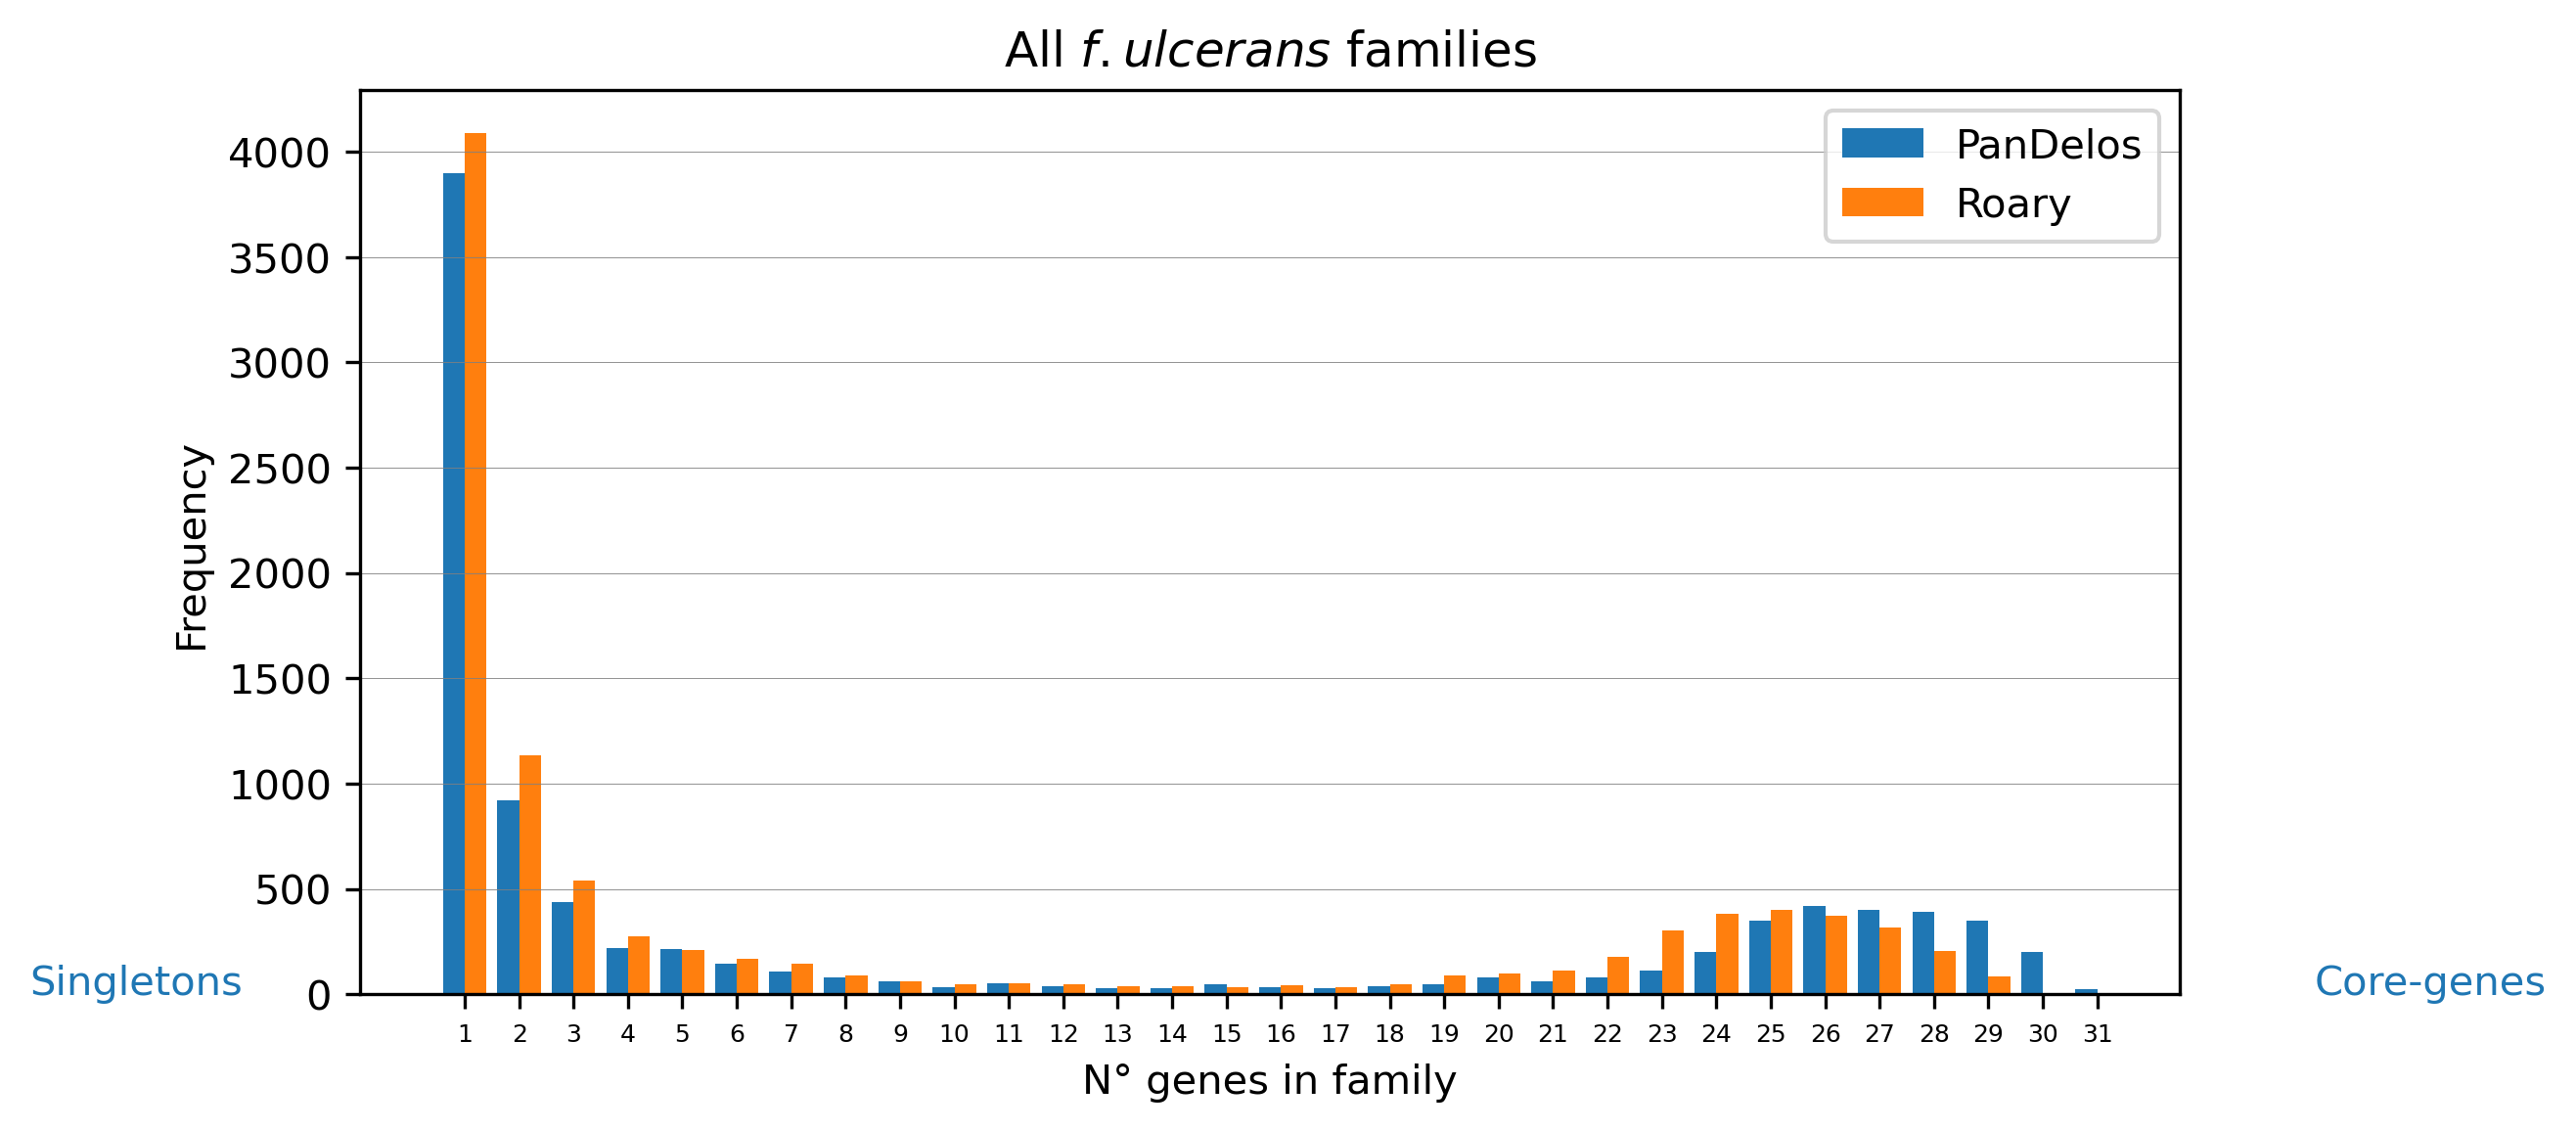

In [6]:
#PLot GF sizes
fig, axe = plt.subplots(figsize=(8,4), dpi=300)

eq = r"Singletons"
axe.text(-7, 0, eq, {'color': 'C0', 'fontsize': 10})
eq = r"Core-genes"
axe.text(len(genome_names)+5, 0, eq, {'color': 'C0', 'fontsize': 10})

plt.xlabel('N° genes in family')
plt.ylabel('Frequency')
plt.title('All $\it{f. ulcerans}$ families')  
plt.bar([l-0.2 for l in list(gf_sizes_delos.keys())],gf_sizes_delos.values(),0.4,label='PanDelos') 
plt.bar([l+0.2 for l in list(gf_sizes_roary.keys())],gf_sizes_roary.values(),0.4,label='Roary') 

plt.grid(True, axis='y', color = "grey", linewidth = "0.2")
plt.xticks(list(gf_sizes_delos.keys()),list(gf_sizes_delos.keys()),fontsize=6)
  
plt.legend(loc='upper right')
plt.show()

In [7]:
df = pd.DataFrame.from_dict(gf_sizes_delos,orient='index')
df_r = pd.DataFrame.from_dict(gf_sizes_roary,orient='index')

df_both = pd.merge(df, df_r, left_index=True, right_index=True)
df_both.columns = ['PanDelos-frags','Roary']
df_both = df_both.sort_index()

tot_pan = df_both['PanDelos-frags'].sum()
tot_roa = df_both['Roary'].sum()

df_both.loc[len(df_both.index)+1]  = [tot_pan,tot_roa]
df_both = df_both.rename(index={df_both.index[-1]: 'TOT'})

In [8]:
df_both

PanDelos-frags  Roary
1              3898   4088
2               921   1132
3               438    539
4               220    275
5               215    209
6               143    169
7               106    146
8                81     88
9                60     59
10               35     48
11               51     52
12               40     45
13               29     40
14               29     40
15               49     35
16               34     41
17               29     35
18               40     48
19               45     90
20               81     97
21               63    112
22               81    176
23              112    304
24              199    384
25              351    402
26              420    371
27              401    316
28              390    207
29              350     83
30              199      5
TOT            9110   9636

## Matching by reference gene

In [9]:
roary_pr=pr.PyRanges(roary_df)
pandelos_pr=pr.PyRanges(pandelos_df)
joined=pandelos_pr.join(roary_pr,strandedness=None, report_overlap=True) 
joined=joined.as_df()
joined = joined.sort_values(by='Overlap',ascending=False)
joined = joined.drop_duplicates(subset='ID',keep='first')
joined

Chromosome    Start      End Strand                                ID  \
1944          1  1286189  1297061      -  NZ_CP028105.1:1286189-1297061(-)   
3346          1  3317087  3327890      -  NZ_CP028105.1:3317087-3327890(-)   
1274          1  2763517  2773801      +  NZ_CP028105.1:2763517-2773801(+)   
1656          1  1088547  1098711      +  NZ_CP028105.1:1088547-1098711(+)   
523           1  1663171  1673200      +  NZ_CP028105.1:1663171-1673200(+)   
...         ...      ...      ...    ...                               ...   
1825          1  3416186  3416291      +  NZ_CP028105.1:3416186-3416291(+)   
100           1  1399250  1399352      +  NZ_CP028105.1:1399250-1399352(+)   
979           1  2274599  2274701      +  NZ_CP028105.1:2274599-2274701(+)   
1735          1  2652741  2652843      +  NZ_CP028105.1:2652741-2652843(+)   
1748          1  2658536  2658635      +  NZ_CP028105.1:2658536-2658635(+)   

                                                 Family  Family_size  Start_b  \
1944  [NZ_CP028105.1reconstructed_K1tcY:1924571-1935...           24  1286190   
3346  [NZ_CP028105.1reconstructed_XNoi4:4256196-4266...           24  3317088   
1274  [NZ_CP028105.1reconstructed_tc057:3223564-3233...            7  2763518   
1656  [NZ_CP028105.1reconstructed_bPGnX:1464183-1474...            9  1088548   
523   [NZ_CP028105.1reconstructed_v2fGG:1663171-1673...            8  1663172   
...                                                 ...          ...      ...   
1825  [NZ_CP028105.1:3416186-3416291(+), NZ_CP028105...            2  3416187   
100   [NZ_CP028105.1reconstructed_SC6lZ:1634235-1634...            3  1399251   
979   [NZ_CP028105.1reconstructed_QaX0L:3136836-3136...           27  2274600   
1735  [NZ_CP028105.1:2652741-2652843(+), NZ_CP028105...            5  2652742   
1748  [NZ_CP028105.1reconstructed_QaX0L:4484701-4484...            4  2658537   

        End_b Strand_b            ID_b        Gene  \
1944  1297061        -  BOBJEOOC_01188   group_643   
3346  3327890        -  BOBJEOOC_03097   group_644   
1274  2773801        +  BOBJEOOC_02595    group_37   
1656  1098711        +  BOBJEOOC_00992    group_38   
523   1673200        +  BOBJEOOC_01567    group_34   
...       ...      ...             ...         ...   
1825  3416291        +  BOBJEOOC_03202  group_5467   
100   1399352        +  BOBJEOOC_01288  group_4764   
979   2274701        +  BOBJEOOC_02124   group_745   
1735  2652843        +  BOBJEOOC_02480  group_2157   
1748  2658635        +  BOBJEOOC_02488  group_5363   

                                               Family_b  Family_size_b  \
1944  [BOBJEOOC_01188, PJBDGICL_01043, NFFDFBNB_0129...              5   
3346   [BOBJEOOC_03097, MLIAGHKK_00617, BOBJEOOC_03097]              3   
1274                   [BOBJEOOC_02595, BOBJEOOC_02595]              2   
1656  [BOBJEOOC_00992, EGBBNIFF_02627, KJIHACMO_0270...              5   
523    [BOBJEOOC_01567, ELPPMPPI_00261, BOBJEOOC_01567]              3   
...                                                 ...            ...   
1825                   [BOBJEOOC_03202, BOBJEOOC_03202]              2   
100   [NPFLPPNE_01815, BPKBGNKM_00552, BOBJEOOC_0128...             10   
979   [MIFNILNM_01220, NPFLPPNE_01085, HBDOHPHN_0137...             15   
1735  [BOBJEOOC_02480, KAKDGIGM_00646, ELPPMPPI_0142...              5   
1748   [BOBJEOOC_02488, KAKDGIGM_00639, BOBJEOOC_02488]              3   

      Overlap  
1944    10871  
3346    10802  
1274    10283  
1656    10163  
523     10028  
...       ...  
1825      104  
100       101  
979       101  
1735      101  
1748       98  

[3200 rows x 15 columns]

In [10]:
# Pandelos has missing overlap of:
missing=np.setdiff1d(np.array(pandelos_df['ID']), np.array(joined['ID']))
pandelos_df[pandelos_df['ID'].isin(missing)]  
len(pandelos_df[pandelos_df['ID'].isin(missing)])

1

In [11]:
#Roary has missing overlap of:
missing=np.setdiff1d(np.array(roary_df['ID']), np.array(joined['ID_b'])) 
roary_gff_df[roary_df['ID'].isin(missing)] 
len(roary_df[roary_df['ID'].isin(missing)]) 

29

## Compare GFs sizes

In [12]:
compare_mapping_genes = []
for g in joined['Gene']:
    p=joined.loc[joined['Gene'] == g,'Family_size'].values[0]
    r=joined.loc[joined['Gene'] == g,'Family_size_b'].values[0] 

    if p>r:
        flag='>'
    elif p<r:
        flag='<'
    else:
        flag='='
    dict_row = {'gene':g, 'GF_size_pandelos': p, 'GF_size_Roary':r,'Flag': flag}
    compare_mapping_genes.append(dict_row)
compare_mapping_genes = pd.DataFrame(compare_mapping_genes)
compare_mapping_genes

gene  GF_size_pandelos  GF_size_Roary Flag
0      group_643                24              5    >
1      group_644                24              3    >
2       group_37                 7              2    >
3       group_38                 9              5    >
4       group_34                 8              3    >
...          ...               ...            ...  ...
3195  group_5467                 2              2    =
3196  group_4764                 3             10    <
3197   group_745                27             15    >
3198  group_2157                 5              5    =
3199  group_5363                 4              3    >

[3200 rows x 4 columns]

In [13]:
compare_mapping_genes.to_csv(comparisondir+'/comparison_GF_sizes.tsv')

Counter({'>': 1591, '=': 1389, '<': 220})


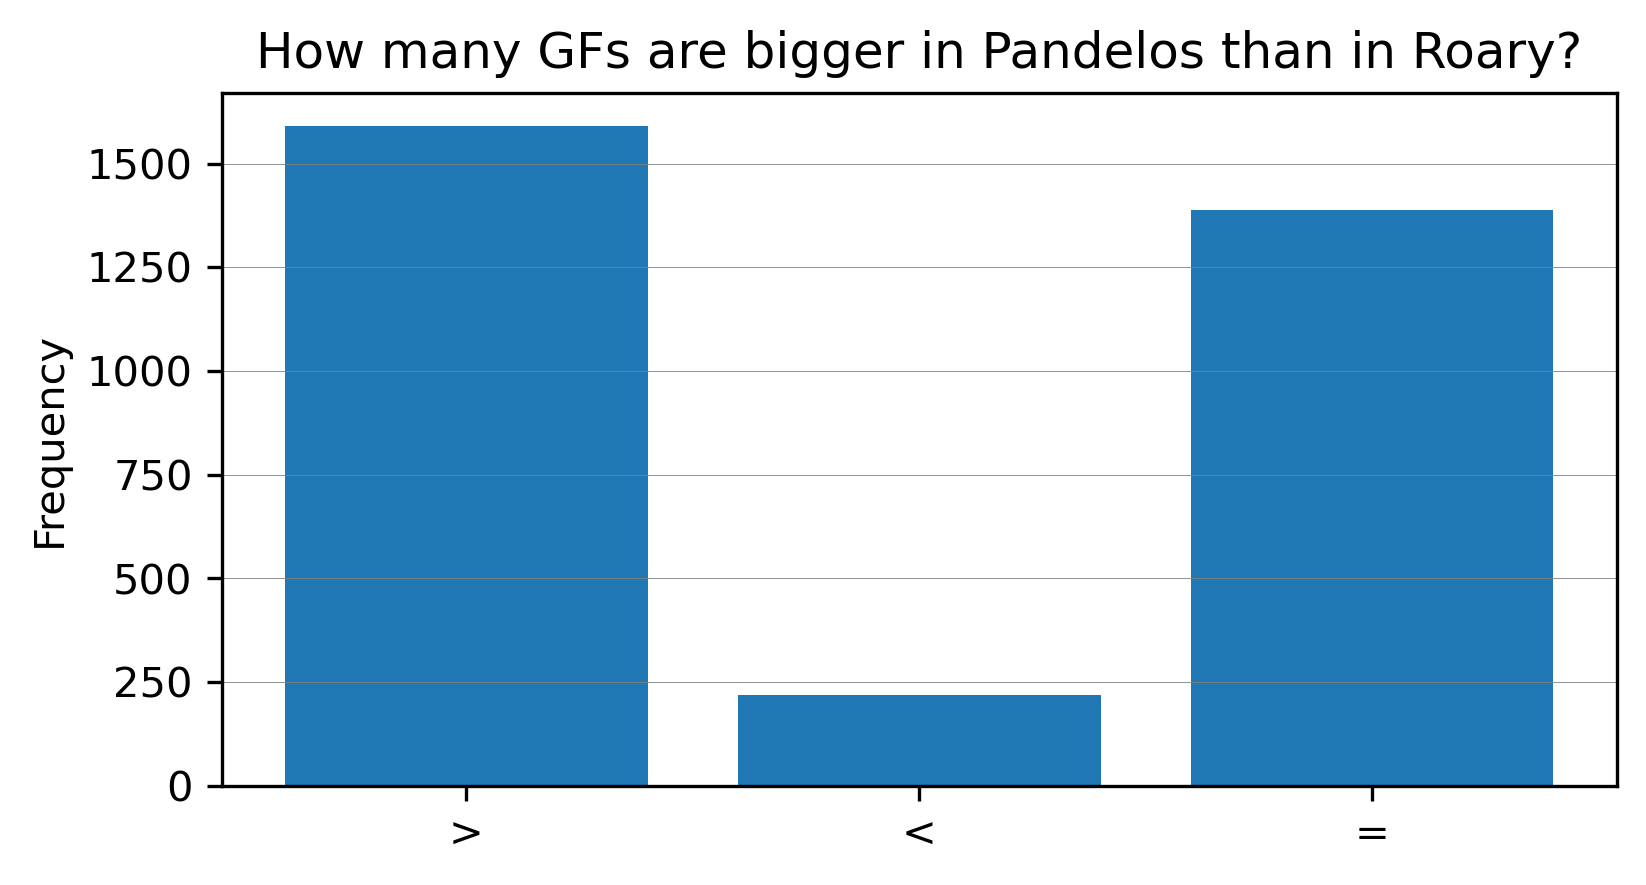

In [14]:
c=Counter(compare_mapping_genes['Flag'])
print(c)
plt.ylabel('Frequency')
plt.title('How many GFs are bigger in Pandelos than in Roary?')
plt.bar(c.keys(),c.values()) 
plt.grid(True, axis='y', color = "grey", linewidth = "0.2")

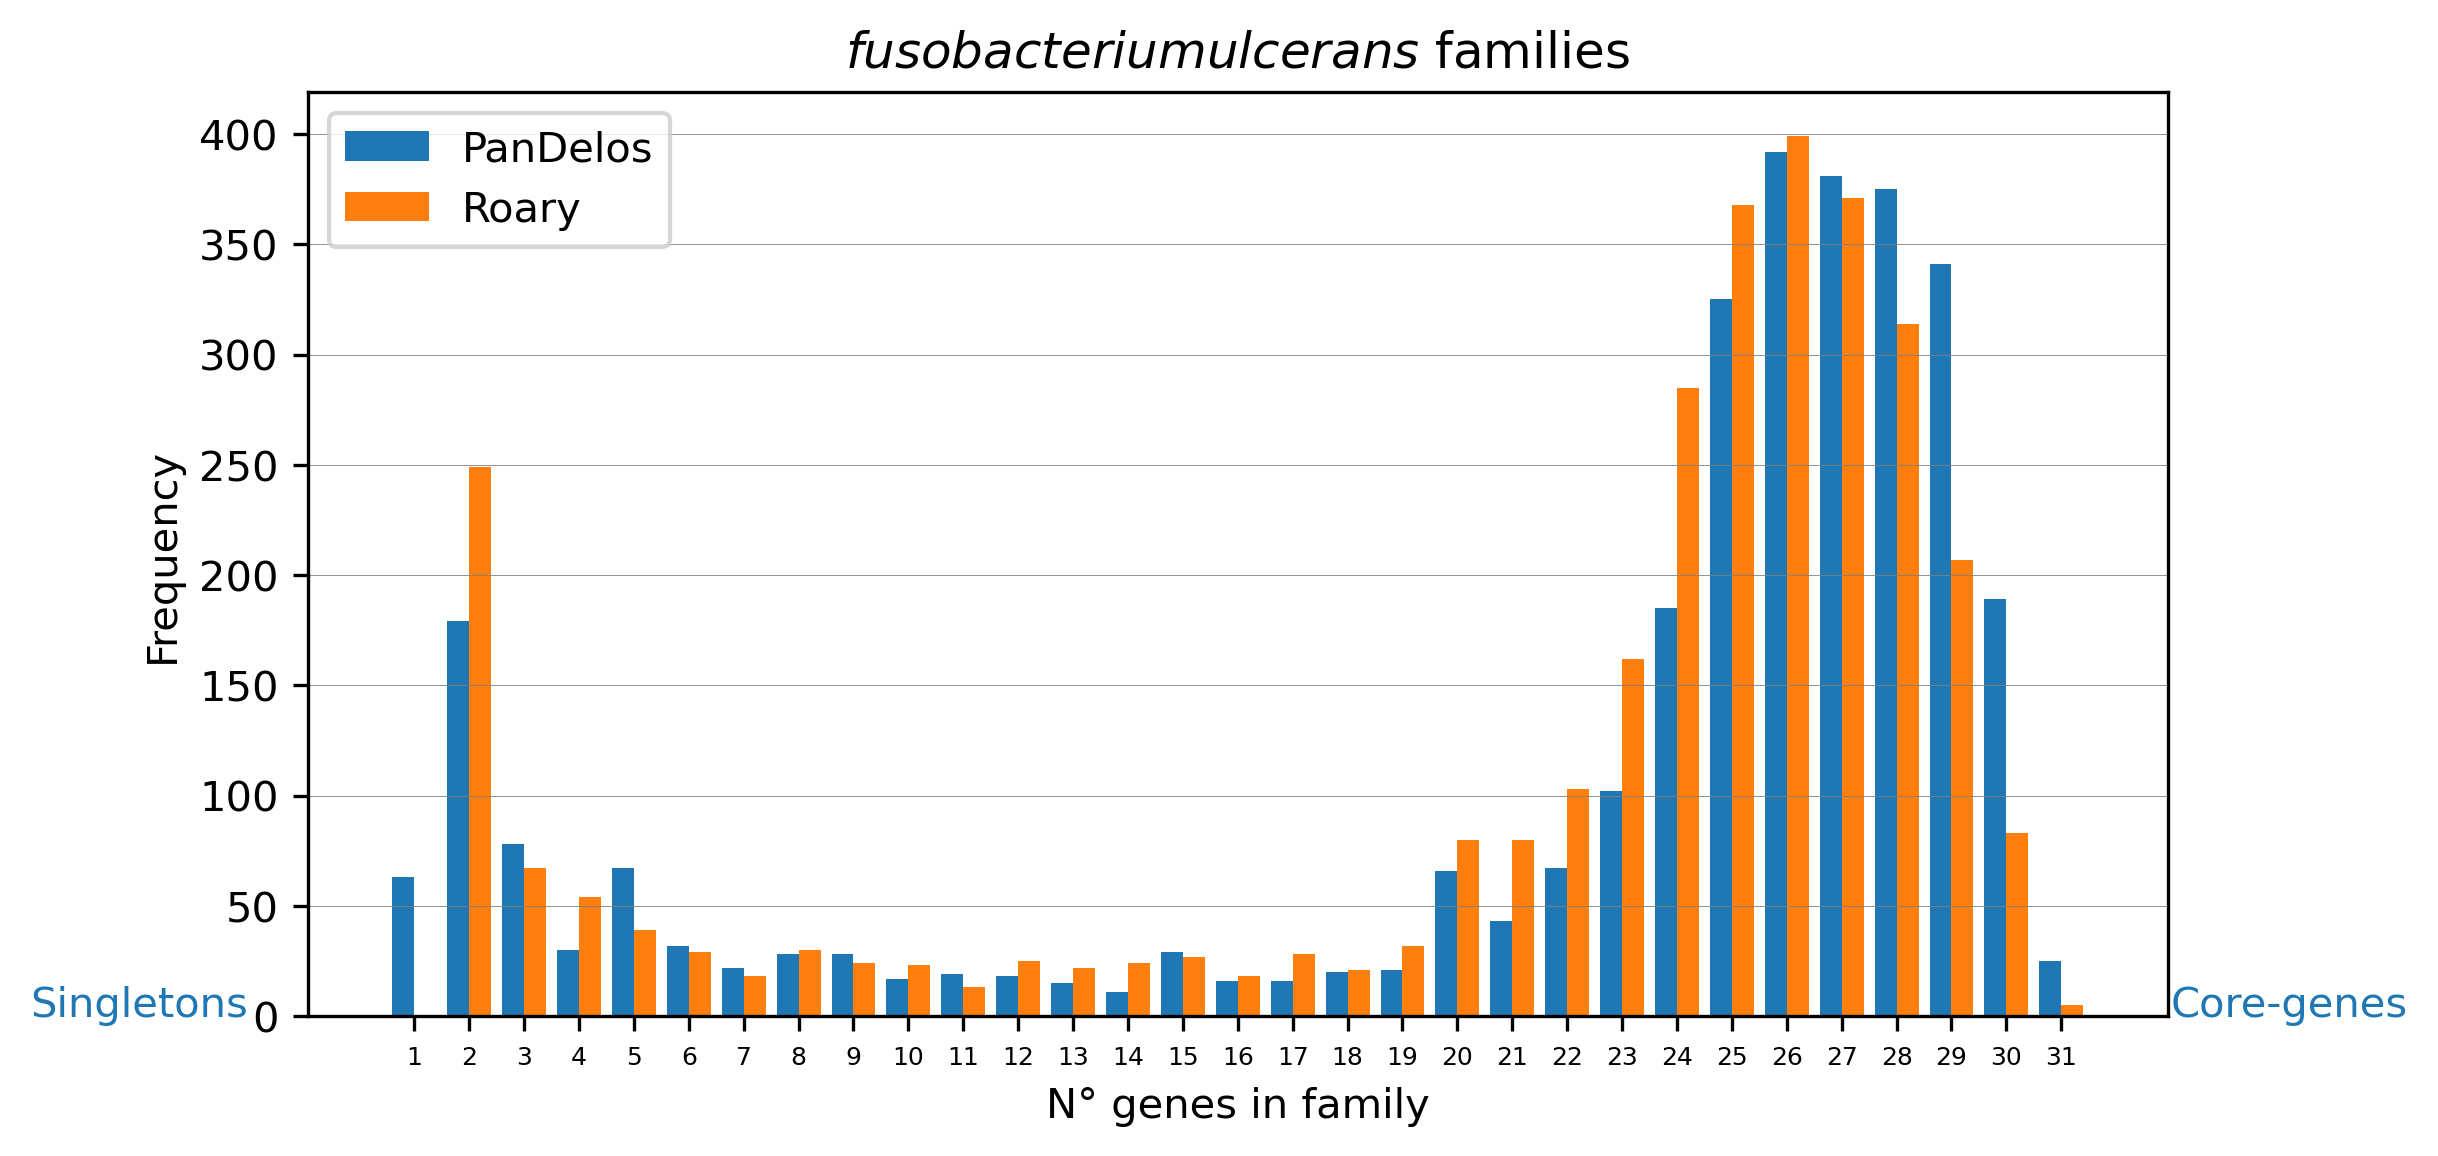

In [15]:
# Same plots as before but only with GFs mapped to each other
c_pan=Counter(compare_mapping_genes['GF_size_pandelos'])
c_roa=Counter(compare_mapping_genes['GF_size_Roary'])


#Together
fig, axe = plt.subplots(figsize=(8,4), dpi=300)

eq = r"Singletons"
axe.text(-6, 0, eq, {'color': 'C0', 'fontsize': 10})
eq = r"Core-genes"
axe.text(33, 0, eq, {'color': 'C0', 'fontsize': 10})

plt.xlabel('N° genes in family')
plt.ylabel('Frequency')
plt.title('$\it{fusobacterium ulcerans}$ families')

 
plt.bar([l-0.2 for l in list(c_pan.keys())],c_pan.values(),0.4,label='PanDelos') 
plt.bar([l+0.2 for l in list(c_roa.keys())],c_roa.values(),0.4,label='Roary') 

plt.grid(True, axis='y', color = "grey", linewidth = "0.2")
plt.xticks(list(c_pan.keys()),list(c_pan.keys()),fontsize=6)
  
plt.legend(loc='upper left')
plt.show()

In [16]:
df = pd.DataFrame.from_dict(c_pan,orient='index')
df_r = pd.DataFrame.from_dict(c_roa,orient='index')

df_both = pd.merge(df, df_r, left_index=True, right_index=True)
df_both.columns = ['PanDelos-frags','ROARY']
df_both = df_both.sort_index()

tot_pan = df_both['PanDelos-frags'].sum()
tot_roa = df_both['ROARY'].sum()

df_both.loc[len(df_both.index)+1]  = [tot_pan,tot_roa]
df_both = df_both.rename(index={df_both.index[-1]: 'TOT'})
df_both

PanDelos-frags  ROARY
2               179    249
3                78     67
4                30     54
5                67     39
6                32     29
7                22     18
8                28     30
9                28     24
10               17     23
11               19     13
12               18     25
13               15     22
14               11     24
15               29     27
16               16     18
17               16     28
18               20     21
19               21     32
20               66     80
21               43     80
22               67    103
23              102    162
24              185    285
25              325    368
26              392    399
27              381    371
28              375    314
29              341    207
30              189     83
TOT            3137   3200

In [17]:
colors_18= ['#dcbeff', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6194b',
             '#9a6324','#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']

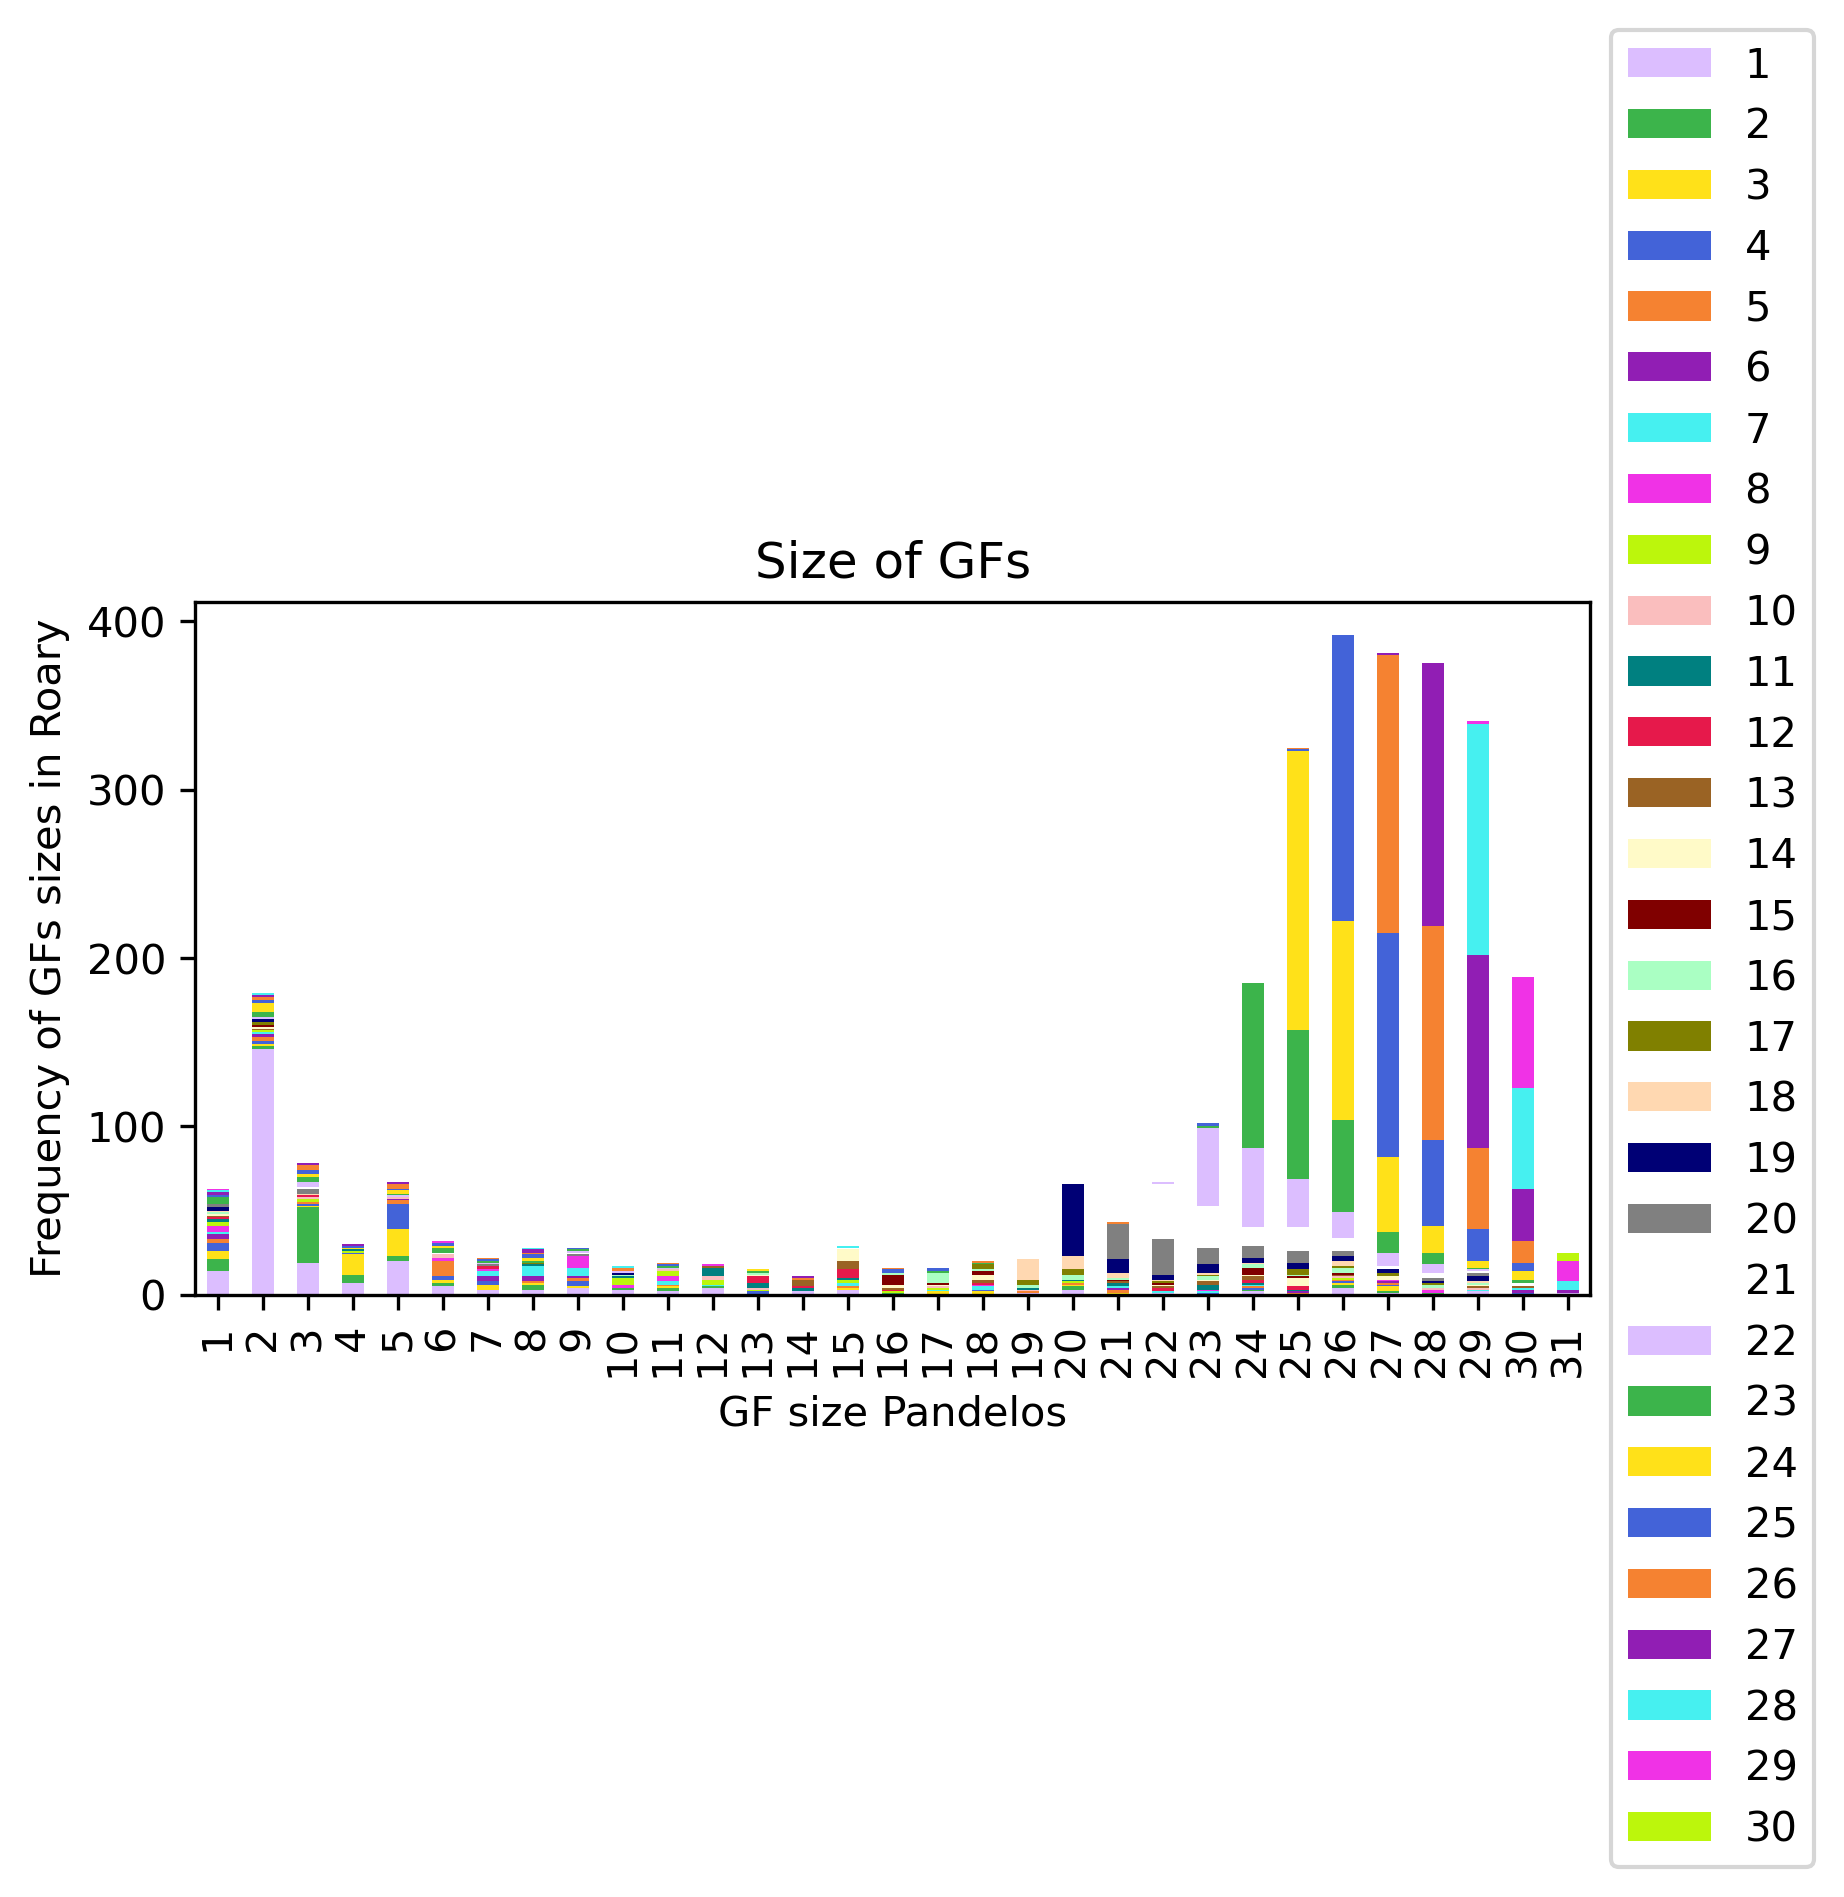

In [18]:

compare_mapping_genes['value']=1
compare_mapping_genes_stratify = compare_mapping_genes.pivot_table(columns='GF_size_Roary',index='GF_size_pandelos',values='value',aggfunc='sum').fillna(0)
#plot it 
compare_mapping_genes_stratify.plot(kind='bar',stacked=True,legend=True,
                                    color= colors_18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=range(1,len(names_df)+1))
plt.ylabel('Frequency of GFs sizes in Roary')
plt.xlabel('GF size Pandelos')
plt.title('Size of GFs')
plt.show()


# Functional analysis preparation

In [119]:
# PREPARE FOR Diamond blastX: 
# For each GF, CHECK THE GENOMES THAT MAP AND THE ONES THAT DON'T. For all of them compute the blastx. split them into mapping and non-mapping
# steps:
# 1) create fasta files, ones for each GF, from panprova annotation
# 2) read them and map with blastx
# 3) split into roary-mapping and non-roary-mapping

# NB Requires coordinates of genes on fragmented genome, which is obtained by running get_fragment_coordinates.py + get_fragment_coordinates.sh

In [19]:
compare_mapping_genes_greater = compare_mapping_genes[compare_mapping_genes['Flag']=='>']

In [20]:
genes_pandelos_1 = np.array(compare_mapping_genes[(compare_mapping_genes['Flag'] == '>')]['gene']) 
pandelos_specific = dict()
for g in genes_pandelos_1 :
    pandelos_genomes_in_g = [f.split(':')[0] for f in joined[joined['Gene']==g]['Family'].values[0]]
    pandelos_genes_in_g = [f for f in joined[joined['Gene']==g]['Family'].values[0]]
    roary_genomes_in_g = [f.split('_')[0] for f in joined[joined['Gene']==g]['Family_b'].values[0]]
    roary_genomes_in_g_pandelostranslated = [names_df[names_df['roary_name']==p]['pandelos_name'].values[0] for p in roary_genomes_in_g]
    #print(joined[joined['Gene']==g]['Family_size'].values[0] - joined[joined['Gene']==g]['Family_size_b'].values[0]==len(pandelos_genomes_in_g)-len(set(roary_genomes_in_g_pandelostranslated)))
    dict_add = {pandelos_genes_in_g[i]:not (p in roary_genomes_in_g_pandelostranslated) for i,p in enumerate(pandelos_genomes_in_g)}
    pandelos_specific.update(dict_add)

In [21]:
df_pandelos_1 = joined[joined['Gene'].isin(genes_pandelos_1)]
frag_dir = delosdir+'/output/fragmented_coordinates/'
records_pan = {}
for d in os.listdir(frag_dir):
    with open(frag_dir+d+'/'+"coordinates_frag.sam") as f:
        lines = f.readlines()
        for l in lines:
            if l.startswith('@'):
                continue
            l = l.split('\t')
            name = l[0]
            seq = l[9]
            records_pan[name] = seq

ref_pandelos= {}
with open(delosdir+'/output/complete/'+ref_genome+'/gene_sequences.fna') as ref_file: 
    lines = ref_file.readlines()
    for l in lines:
        if l.startswith('>'):
            name = l.split('\t')[1]
        else:
            seq = l.strip()
        
        ref_pandelos[name] = seq
records_pan.update(ref_pandelos)

GF_dir = comparisondir+'/GFs'
os.makedirs(GF_dir,exist_ok=True)
os.makedirs(GF_dir+'/fasta',exist_ok=True)


for r in df_pandelos_1.index:
    gene = df_pandelos_1.loc[r,'Gene']
    #ID = df_pandelos_1.loc[r,'ID']
    genome_with_families = df_pandelos_1.loc[r,'Family'] 

    with open(GF_dir+'/fasta/'+gene+'.fa','w') as f:
        for g in genome_with_families:
            if g in pandelos_specific:
                if pandelos_specific[g]:
                    g_lab = g +'_PANSPECIFIC'
                else:
                    g_lab = g +'_GENERAL'
                f.write('>'+g_lab+'\n')
                f.write(str(records_pan[g])+'\n')

In [24]:
import subprocess
faa_reference = roarydir+'/prokka/'+'prokka_'+ref_genome+'/*.faa'
ret=subprocess.call(['bash',basedir+"/run_diamond.sh",species,faa_reference],stdout=subprocess.DEVNULL)

diamond v2.0.14.152 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: /home/claudia/Desktop/ADAIR/PanDelos-frags/PanDelos-fragments/examples/fusobacterium_ulcerans/Roary/prokka/prokka_GCF_003019675.1_ASM301967v1_genomic.fna/PROKKA_12232022.faa
Opening the database file...  [0s]
Loading sequences...  [0.009s]
Masking sequences...  [0.028s]
Writing sequences...  [0.001s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.003s]

Database sequences  3229
  Database letters  1043042
     Database hash  1320d2884334923423bc360ac2273191
        Total time  0.047000s
diamond v2.0.14.152 (C) Max Planck Society for the Advancement o